In [33]:
import xnet
import json
import glob
import util

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,spearmanr

from collections import OrderedDict

from igraph import *

In [34]:
history_out_filename = 'data/authors_pac_out_2lvls_2multi.json'
history_in_filename = 'data/authors_pac_in_2lvls_2multi.json'
history_filename = 'data/authors_pac_2lvls_2multi.json'

In [35]:
data = xnet.xnet2igraph('data/citation_network_ge1985_pacs.xnet')

In [36]:
filenames = sorted(glob.glob('data/pacs/2lvls/*_delta4_multilevel2.xnet'))
pac_nets = []
for filename in filenames:
    net = xnet.xnet2igraph(filename)
    pac_nets.append(net)

In [37]:
# for net in pac_nets:
#     print(set(net.vs["community"]))

In [38]:
history_out = util.load(history_out_filename)
authors_out_div = util.authors_metric(history_out,util.get_div) # diversidade das publicações citadas (author out)
history_in = util.load(history_in_filename)
authors_in_div = util.authors_metric(history_in,util.get_div) # diversidade das publicações que citam o autor (author in)
# valid_authors_by_area = util.get_area(data,pac_nets,util.get_pacs_paper_published,4)
authors_ranking_min25_by_year = util.load('data/authors_ranking_min25_by_year.json')

In [39]:
authors_ranking_min25_by_year = {year:set(authors) for year,authors in authors_ranking_min25_by_year.items()}

In [40]:
def authors_metric(valid_authors,history,get_div):
    # as chaves de valid_authors é str
    authors = dict()
    L = len(history)
    c = 0
    for author,a_history in history.items():
        a_div = util.author_div(a_history,get_div)
        # calcula a diversidade apenas para os anos que o autor tem no min 25 citações e referências
        valid_years_div = {year:div for year,div in a_div.items() if author in valid_authors[year]}
        authors[author] = valid_years_div
        c += 1
        if c%10000 == 0:
            print(100*c/L)
    return authors

In [41]:
authors_in_symmetry = authors_metric(authors_ranking_min25_by_year,history_in,util.get_asymmetry)

3.0064880011063875
6.012976002212775
9.019464003319163
12.02595200442555
15.032440005531939
18.038928006638326
21.045416007744713
24.0519040088511
27.058392009957487
30.064880011063877
33.07136801217026
36.07785601327665
39.08434401438304
42.090832015489426
45.097320016595816
48.1038080177022
51.11029601880859
54.116784019914974
57.123272021021364
60.129760022127755
63.13624802323414
66.14273602434052
69.14922402544691
72.1557120265533
75.1622000276597
78.16868802876608
81.17517602987246
84.18166403097885
87.18815203208524
90.19464003319163
93.20112803429801
96.2076160354044
99.21410403651079


In [42]:
authors_out_symmetry = authors_metric(authors_ranking_min25_by_year,history_out,util.get_asymmetry)

2.7581109146723226
5.516221829344645
8.274332744016968
11.03244365868929
13.790554573361613
16.548665488033937
19.30677640270626
22.06488731737858
24.822998232050903
27.581109146723225
30.339220061395547
33.09733097606787
35.855441890740195
38.61355280541252
41.37166372008484
44.12977463475716
46.887885549429484
49.645996464101806
52.40410737877413
55.16221829344645
57.92032920811877
60.678440122791095
63.436551037463424
66.19466195213575
68.95277286680806
71.71088378148039
74.4689946961527
77.22710561082503
79.98521652549735
82.74332744016968
85.50143835484201
88.25954926951432
91.01766018418665
93.77577109885897
96.5338820135313
99.29199292820361


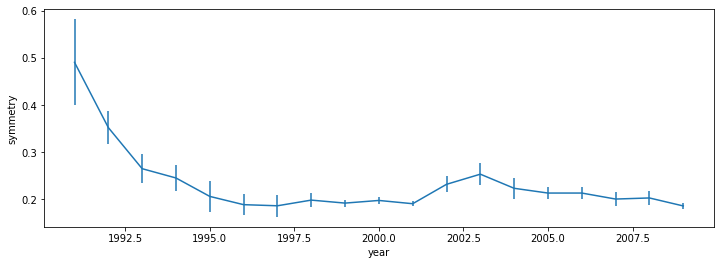

In [14]:
means = []
stds = []
years = []
for year in range(1991,2010):
    X = []
    for a,sim in authors_in_symmetry.items():
        try:
            x = sim[str(year)]
            X.append(x)
        except:
            pass
    X = sorted(X)[:500]
    mean = np.mean(X)
    means.append(mean)
    std = np.std(X)
    stds.append(std)
    years.append(year)

plt.figure(figsize=(12,4))
plt.xlabel('year')
plt.ylabel('symmetry')
plt.errorbar(years,means,yerr=stds)
plt.savefig('sym_years.pdf')
    

500
1744530486 1990
2587651803 1990
536628356 1990
428805443 1990
403683876 1990
390792772 1990
366014254 1990
2757807376 1990
2615516698 1990
2608780572 1990
2606447694 1990
2601356627 1990
2581216324 1990
2512096418 1990
2488002498 1990
2487337144 1990
2464077679 1990
2330508840 1990
2310923764 1990
2310255343 1990
2307028986 1990
2304125593 1990
2288865067 1990
2270441671 1990
2263792661 1990
2246966491 1990
2228778750 1990
2190366191 1990
2163585639 1990
2159471069 1990
2151348369 1990
2140116005 1990
2136374928 1990
2129421475 1990
2120881549 1990
2110722397 1990
2095887176 1990
2080560548 1990
2076338926 1990
2057132207 1990
2052620048 1990
2046137232 1990
2035906164 1990
2029396712 1990
2029271787 1990
2001749612 1990
2000482332 1990
1976687569 1990
1971720547 1990
1965992559 1990
1896690256 1990
1517305831 1990
1363795305 1990
2280890523 1990
1994662623 1990
2555497642 1990
2464612650 1990
2111161316 1990
2108998894 1990
1906291325 1990
2222572647 1990
2432524694 1990
201615794

500
2360957305 2005
500
2420897326 2006
2325795467 2006
2622764937 2006
2607347507 2006
2599511694 2006
2312406110 2006
2114527585 2006
2083088057 2006
500
500
500
500


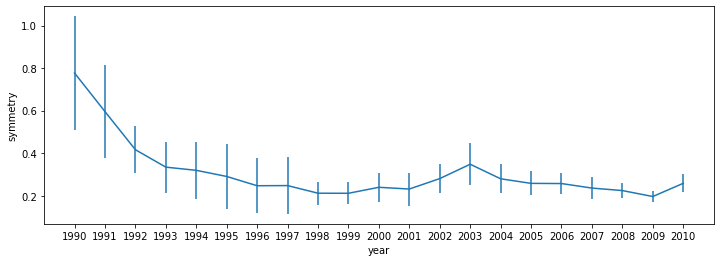

In [23]:
top_500 = util.load('data/authors_in_ranking500_by_year.json')
means = []
stds = []
years = []
for year,authors in top_500.items():
    years.append(year)
    print(len(authors))
    sims = []
    for author in authors:
        try:
            s = authors_in_symmetry[author][str(year)]
            sims.append(s)
        except:
            print(author,year)
    means.append(mean(sims))
    stds.append(np.std(sims))

plt.figure(figsize=(12,4))
plt.xlabel('year')
plt.ylabel('symmetry')
plt.errorbar(years,means,yerr=stds)
plt.savefig('sym_top_500.pdf')

In [65]:
def authors_symmetry_diff(authors_in_symmetry,delta):
    authors_in_symmetry_diff = defaultdict(lambda:defaultdict(lambda:0))
    for author,syms in authors_in_symmetry.items():
        for year1,sym in syms.items():
            year0 = str(int(year1)-delta)
            if int(year0) > 1990:
                try:
                    diff = sym - syms[year0]
                    if syms[year0] == 0:
                        diff = 1
                    else:
                        diff = diff/syms[year0]
                    authors_in_symmetry_diff[author][year1] = diff
                    
#                     if diff == 0:
#                         print('diff == 0',author,year1,syms)
                except:
                    # quando o autor nao está como valido no ano calculado
                    pass
                    
    return authors_in_symmetry_diff

In [66]:
# authors_in_sym5 = authors_symmetry_diff(authors_in_symmetry,5)
# authors_in_sym3 = authors_symmetry_diff(authors_in_symmetry,3)
authors_in_div1 = authors_symmetry_diff(authors_in_div,1)

In [67]:
authors_in_div1['2103334765']

defaultdict(<function __main__.authors_symmetry_diff.<locals>.<lambda>.<locals>.<lambda>()>,
            {'1992': -0.08220635043163518,
             '1993': -0.009207844344407386,
             '1994': 0.020880025239562366,
             '1995': -0.34179278965498927,
             '1996': 0.0,
             '1997': 0.0,
             '1998': 0.0,
             '1999': 0.027361607285355527,
             '2000': 0.061284679358557435,
             '2001': 0.09332080120025069,
             '2002': 0.5126824941806798,
             '2003': -0.3703856516131397,
             '2004': 0.1286927677746492,
             '2005': -0.002711814172543415,
             '2006': -0.12432410011815283,
             '2007': -0.04495261302741375,
             '2008': 0.17108360264905237,
             '2009': -0.20104534782769504,
             '2010': 0.0})

In [47]:
def get_citations(data,year_begin,year_end,delta,delta_key):
    history = defaultdict(lambda:defaultdict(lambda:0))

    for i,year in enumerate(range(year_begin,year_end+1)):
#         print("current year %d" % year)
        subset = data.vs.select(year_ge=year,year_le=year+delta)
        
        for paper in subset:
            neighbors = data.neighbors(paper,mode=OUT)
            for vtx_idx in neighbors:
                vtx = data.vs[vtx_idx]
                authors_idxs = vtx['authors_idxs'].split(',')
                for a in authors_idxs:
                    history[year+delta_key][a] += 1
    
    return history

def get_references(data,year_begin,year_end,delta,delta_key):
    history = defaultdict(lambda:defaultdict(lambda:0))

    for i,year in enumerate(range(year_begin,year_end+1)):
#         print("current year %d" % year)
        subset = data.vs.select(year_ge=year,year_le=year+delta)
        
        for paper in subset:
            neighbors = data.neighbors(paper,mode=IN)
            for vtx_idx in neighbors:
                vtx = data.vs[vtx_idx]
                authors_idxs = vtx['authors_idxs'].split(',')
                for a in authors_idxs:
                    history[year+delta_key][a] += 1
    
    return history

In [48]:
future_citations = get_citations(data,1990,2006,1,0)
past_citations = get_citations(data,1988,2004,1,2)

In [49]:
top_min25 = util.load('data/authors_ranking_min25_by_year.json')

In [50]:
# plot 3x3
def plot_future_past_div(past_citations,future_citations,authors_in_div,top_min25,cmap,delta,title):
    for year,past in past_citations.items():
        future = future_citations[year]
        print(year)
        
        plt.figure(figsize=(4,3))
        freq = list(past.values())
        bin_edges = np.logspace(0, np.log10(max(freq)),4)
        hist0,bins0,_ = plt.hist(freq,bins=bin_edges)
        plt.title(year)
        plt.xlabel('$\Delta K_{P}$ - citações do passado (2 anos)')
        plt.ylabel('número de autores')
        plt.xscale("log")
        plt.yscale("log")
        plt.tight_layout()
        plt.savefig("hist_delta_K_P_%s.pdf" % year)
        plt.close()

        authors_by_bin = defaultdict(lambda:[])
        for a,c in past.items():
            idx = np.searchsorted(bin_edges,c)
            if idx == 0:
                idx = 1
            elif idx == len(bin_edges):
                idx -= 1
            authors_by_bin[idx].append(a)

        N = len(bins0)
#         f, axs = plt.subplots(N//3, 3, sharex=False, sharey=False, figsize=((N//3)*3,9))
        f, axs = plt.subplots(3, 1, sharex=False, sharey=False, figsize=(6,12))
        f.suptitle("%d  (%s)" % (year,title))
        i = 0
        to_plot = True
        IDXS = sorted(list(authors_by_bin.keys()))
        for idx in IDXS:
            group = authors_by_bin[idx]
            X = []
            Y = []
            for a in group:
#                 if a not in top_min25[str(year)]:
#                     continue
                try:
                    x = authors_in_div[a][str(year-1)]
                    y = future[a]
                    X.append(x)
                    Y.append(y)
                except:
                    pass
            if len(X) <= 1:
                to_plot = False
                plt.clf()
                continue
            #print(X[:10],Y[:10])
            p = pearsonr(X,Y)[0]
            s = spearmanr(X,Y)[0]
#             axs[i%3].text(min(X)+0.03,max(Y)*0.9,'p=%.2f\ns=%.2f' % (p,s))
            axs[i%3].scatter(X,Y,alpha=0.6,c=[cmap(idx/N)]*len(X),rasterized=True)
            
            axs[i%3].set_title('%.2f $<\Delta K_{P}\leq$ %.2f pearson = %.2f; spearman =%.2f' % (bins0[idx-1],bins0[idx],p,s))
            axs[i%3].xaxis.set_tick_params(labelsize=8)
            i+=1
        if to_plot:
#             plt.tight_layout()
            f.text(0.5, 0.04, '$\Delta d$ - simetria (3 anos do passado)', ha='center')
            f.text(0.04, 0.5, '$\Delta K_{F}$ - citações do futuro (2 anos)', va='center', rotation='vertical')
#             plt.tight_layout()
            plt.savefig("scatter_delta_d_delta_K_F_%s_%d_333.pdf"%(year,delta))
            plt.clf()

In [60]:
# plot 1x1
def plot_future_past_div_all(past_citations,future_citations,authors_in_div,cmap,delta):
    for year,past in past_citations.items():
        future = future_citations[year]
        print(year)
        
        plt.figure(figsize=(4,3))
        freq = list(past.values())
        bin_edges = np.logspace(0, np.log10(max(freq)),10)
        hist0,bins0,_ = plt.hist(freq,bins=bin_edges)
        plt.title(year)
        plt.xlabel('$\Delta K_{P}$ - citações do passado (2 anos)')
        plt.ylabel('número de autores')
        plt.xscale("log")
        plt.yscale("log")
        plt.tight_layout()
        plt.savefig("hist_delta_K_P_%s.pdf" % year)
        plt.close()
        
        authors_by_bin = defaultdict(lambda:[])
        for a,c in past.items():
            idx = np.searchsorted(bin_edges,c)
            if idx == 0:
                idx = 1
            elif idx == len(bin_edges):
                idx -= 1
            authors_by_bin[idx].append(a)
        
        plt.figure(figsize=(8,6))
        X_all = []
        Y_all = []
        for b,authors in authors_by_bin.items():
            X = []
            Y = []
            for a in authors:
                x = authors_in_div[a][str(year-1)]
                y = future[a]
                X.append(x)
                Y.append(y)
            plt.scatter(X,Y,alpha=0.6,label='%.2f $<\Delta K_{P}\leq$ %.2f' % (bins0[b-1],bins0[b]),rasterized=True)
        
        X_all += X
        Y_all += Y
        
        X_all = np.asarray(X_all)
        Y_all = np.asarray(Y_all)
        
        X_all = X_all[~np.isnan(X_all)]
        Y_all = Y_all[~np.isnan(Y_all)]
        
        if len(X_all) < 3:
            plt.close()
            continue
        print(X_all,Y_all)
        p = pearsonr(X_all,Y_all)[0]
        s = spearmanr(X_all,Y_all)[0]
        plt.xlabel('$\Delta d$ - diversidade (%d anos do passado) p=%.2f\ns=%.2f'% (delta,p,s))
        plt.ylabel('$\Delta K_{F}$ - citações do futuro (2 anos)')
        plt.legend(bbox_to_anchor=(0.9, 0.5, 0.5, 0.5))
        plt.tight_layout()
        plt.savefig("scatter_delta_d_delta_K_F_%s_%d_all.pdf"%(year,delta))
        plt.close()

In [52]:
cmaps = OrderedDict()
cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']
cmap = plt.get_cmap(cmaps['Cyclic'][-1])

In [68]:
plot_future_past_div_all(past_citations,future_citations,authors_in_div1,cmap,1)
# plot_future_past_div_all(past_citations,future_citations,authors_in_sym3,cmap,3)

1990
1991
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [478 188 187 171 202 283 228 128 366 195 354 308 207 183 386 296 241 309
 284 171 186 182 168 168 170 202 168 202 168 163 202 168 168 202 202 148
 149 146 168 174 177 163 168 181 176 202 168 205 202 173 127 168 182 202
 152 171 177 186 168 168 168 168 178 168 202 168 202 127 168 147 168 170
 168 202 168 202 182 182 168 168 181 164 202 188 168 202 168 199 166 176
 168 168 176 173 168 193 182 186 152 202 168 168 202 168 202 168 202 176
 168 168 182 152 168 173 174 202 202 133 168 161 168 168 202 168 168 152
 168 168 168 176 168 176 168]


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

1992
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [223 163 140 341 134 162 114 222 222 328 183 214 113 190 198 211 159 102
 135 179 118 255 248 249 202 230 154 130 114 371 192 218 137 119 110 153
 112 192 154 189 167 204 239  85 149 104 255 300 172 233 114 234 288 153
  89  89 125 195 108 198  60 180 298 228 258 122 362 115 237 245 231 200
 219 251 215 230 281 231 264 220 220 220 252 194 209 281 220 220 194 213
 248 281 209 220 225 100 216 194 248 281 286 223 193 226 221 109 220 220
 220 209 193 252 273 220 194 202 263 248 219 220 205 261 242 20

/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

1993
[ 0.12104459  0.02087805  0.28165557 -0.03135274  0.06070837  0.12776628
  0.05976637 -0.0100516   0.06196344 -0.06718281  0.04685793  0.1310652
  0.14218411 -0.14979472 -0.00343574  0.14976386  0.00843082  0.16431116
  0.01500034  0.0121929   0.08380708 -0.01261202 -0.02805401  0.12764298
  0.04359868  0.149064    0.02763783  0.08040288  0.04090709  0.0030255
  0.01007104  0.05640025 -0.05456537  0.09314565 -0.0190366  -0.01608662
 -0.01456759  0.01258826  0.02343712  0.02145153 -0.01087051  0.03312723
  0.06845232  0.01517407 -0.01589843 -0.06370102 -0.04336347 -0.04580211
 -0.03044565 -0.03218682 -0.00975298 -0.00103178 -0.00544644 -0.02336219
  0.06657924  0.03500339 -0.01095307  0.04269682  0.0919691  -0.04106311
  0.00400911 -0.03512878  0.07132741  0.07674173  0.06186869  0.33053571
 -0.03540137 -0.04131521 -0.08710324 -0.07978771 -0.00637172  0.10149869
  0.09551431  0.01864488  0.28598701  0.27194385  0.24062717 -0.07945076
  0.0939885   0.06989713  0.10901211  0.19799831

1995
[ 0.          0.         -0.05505921 ... -1.         -1.
 -1.        ] [4 4 1 ... 0 1 1]
1996
[-0.47086632  0.         -1.         ...  0.          0.
  0.        ] [ 1 10  1 ...  3  7  3]
1997
[ 0.07414546  0.10467995  0.02159137 -0.17079516  0.00434623 -0.01076719
  0.00434623 -0.00960317  0.01160185  0.00434623 -0.16656193 -0.01633447
  0.00103129  0.00608969  0.00434623  0.00831377 -0.00960317  0.01120463
  0.00434623  0.00434623  0.0084784   0.00434623  0.00434623 -0.00633076
  0.00434623 -0.02037249  0.01885096 -0.00960317 -0.00633076  0.00103129
 -0.00960317 -0.00960317 -0.00424903  0.00434623 -0.00633076 -0.03038419
  0.03774514  0.01783407 -0.17106552  0.01679267  0.13123958  0.11623827
 -0.00326303 -0.0444917  -0.05200591  0.08844608  0.03534924  0.07841817
  0.04731972 -0.04357186 -0.03487382 -0.01321871 -0.06645727  0.03520615
  0.04832652  0.0211137  -0.16536441  0.04027561  0.08468975  0.11487713
  0.00198312  0.00800776  0.04474382  0.03220789 -0.13724285  0.0264373

2003
[ 0.  0. -1. ...  0.  0.  0.] [6 4 6 ... 0 0 1]
2004
[ 0.          0.         -0.31392626 ...  1.          0.
  0.        ] [10 11 17 ...  0  0  0]
2005
[0. 0. 0. ... 0. 0. 0.] [8 2 3 ... 1 0 0]
2006
[-1.          0.17914669  1.         ...  1.          1.
  1.        ] [3 5 0 ... 3 2 2]


In [29]:
plot_future_past_div(past_citations,future_citations,authors_in_sym5,top_min25,cmap,5,'sem overlap')
plot_future_past_div(past_citations,future_citations,authors_in_sym3,top_min25,cmap,3,'com overlap')

1990


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

1991


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

1992


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

1993


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

1994


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

1995


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

1996


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

1997


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

1998


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

1999


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

2000


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

2001


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

2002


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

2003


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

2004


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

2005


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

2006


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

1990


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

1991


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

1992


/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value en

1993


/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: R

1994


/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: R

1995


/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: R

1996


/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: R

1997


/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: R

1998


/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1999


/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: R

2000


/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: R

2001


/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: R

2002


/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2003


/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2004


/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/carol/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/carol/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: R

2005


/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2006


/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/home/carol/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

<Figure size 432x864 with 0 Axes>

In [229]:
# plot 1x1
def plt_simetria_years(past_citations,sim,cmap):
    authors_by_bin = defaultdict(lambda:defaultdict(lambda:[]))
    for year,past in past_citations.items():
        freq = list(past.values())
        freq = sorted(freq)
        
        x25 = np.percentile(freq,25)
        x50 = np.percentile(freq,50)
        x75 = np.percentile(freq,75)
        perce = [x25,x50,x75,max(freq)]
        
        for a,c in past.items():
            for idx,p in enumerate(perce):
                if c <= p:
                    authors_by_bin[idx][year].append(a)
                    break
    perce_x = ['$\Delta K_p \leq p_{25}$',
               '$ p_{25} < \Delta K_p \leq p_{50}$',
               '$ p_{50} < \Delta K_p \leq p_{75}$',
               '$\delta K_p \geq p_{75}$']
    for b,idx_authors in authors_by_bin.items():
        plt.figure(figsize=(12,4))
        
        X_years = []
        for year,authors in idx_authors.items():
            X = []
            for a in authors:
                try:
#                     print(sim[a])
                    x = sim[a][str(year)]
                    X.append(x)
                except:
                    pass
            X_years.append(X)
        print(len(X_years))
        plt.boxplot(X_years,labels=list(idx_authors.keys()))
        plt.xlabel('ano')
        plt.ylabel('simetria')
        plt.title(perce_x[b])
        plt.tight_layout()
        plt.savefig("simetria_in_anos_%s_all.pdf"%(b))
        plt.close()

In [230]:
plt_simetria_years(past_citations,authors_in_symmetry,cmap)

17
17
17
16


In [17]:
from sklearn import metrics

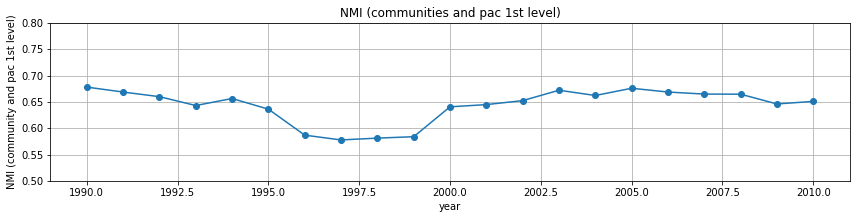

In [18]:
year = 1990
years = []
nmis = []
for net in pac_nets:
    codes = [c[0] for c in net.vs['name']]
    comms = net.vs['community']
    nmi = metrics.normalized_mutual_info_score(codes,comms,average_method='min')
    
    years.append(year)
    nmis.append(nmi)
    
    year += 1

plt.figure(figsize=(12,3))
plt.plot(years,nmis,'o',ls='-')
plt.xlabel('year')
plt.ylabel('NMI (community and pac 1st level)')
plt.ylim(0.5, 0.8)
plt.tight_layout()
plt.grid()
plt.title('NMI (communities and pac 1st level)')
plt.savefig('nmi_comms_pac.pdf')

In [12]:
# citações por diversidade em um dado ano
year1_citations = get_citations(data,1990,2006,0,0)

In [39]:
year1_references = get_references(data,1990,2006,0,0)

In [41]:
def div_in_cits(year1_citations,authors_in_div,title):
    corrs = []

    years = list(range(1995,2007))

    print(years)
    for year in years:
        citations_in_year = year1_citations[year]
        x = []
        y = []
        for author_id,cits in citations_in_year.items():
            try:
                y.append(authors_in_div[author_id][str(year)])
                x.append(cits)
            except:
                pass
        s = spearmanr(x,y)[0]
        corrs.append(s)
#         plt.scatter(x,y,alpha=0.4,rasterized = True)
#         plt.xlabel('citations (%d)'%year,fontsize=14)
#         plt.ylabel('diversity (last 5 years)',fontsize=14)
#         plt.savefig('cits_divs_%d.pdf' % year)
#         plt.title(year)
#         plt.clf()
    plt.figure(figsize=(12,4))
    plt.plot(years,corrs)
    plt.title(title)
    plt.savefig(title+'.png')
    

In [ ]:
div_in_cits(year1_citations,authors_in_symmetry,'sym in spearman citations')
div_in_cits(year1_citations,authors_out_symmetry,'sym out spearman citations')

[1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006]
[1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006]
[1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006]


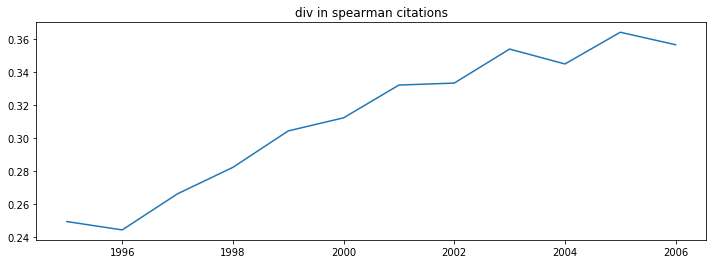

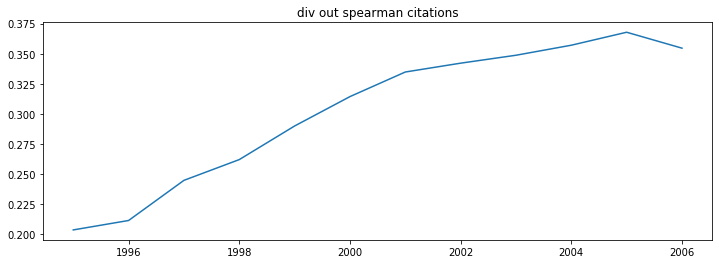

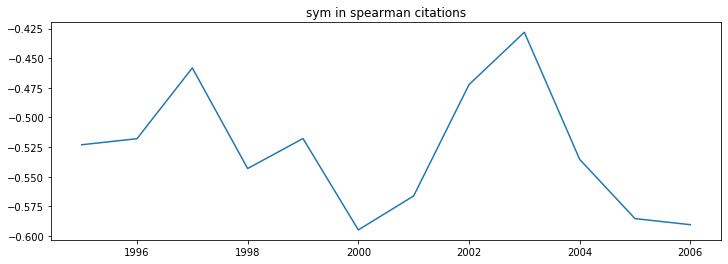

In [36]:
div_in_cits(year1_citations,authors_in_div,'div in spearman citations')
div_in_cits(year1_citations,authors_out_div,'div out spearman citations')

[1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006]


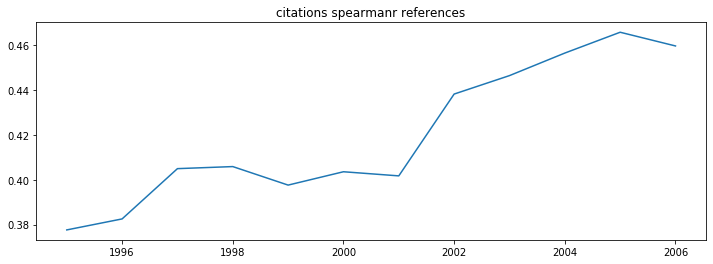

In [45]:
corrs = []

years = list(range(1995,2007))

print(years)
for year in years:
    citations_in_year = year1_citations[year]
    references_in_year = year1_references[year]
    x = []
    y = []
    for author_id,cits in citations_in_year.items():
        try:
            y.append(references_in_year[author_id])
            x.append(cits)
        except:
            pass
    s = spearmanr(x,y)[0]
    corrs.append(s)
#         plt.scatter(x,y,alpha=0.4,rasterized = True)
#         plt.xlabel('citations (%d)'%year,fontsize=14)
#         plt.ylabel('diversity (last 5 years)',fontsize=14)
#         plt.savefig('cits_divs_%d.pdf' % year)
#         plt.title(year)
#         plt.clf()
plt.figure(figsize=(12,4))
plt.plot(years,corrs)
title = 'citations spearmanr references'
plt.title(title)
plt.savefig(title+'.png')
